In [1]:
import pandas as pd

In [3]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [4]:
diabetes.head(5)

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Number_pregnant          768 non-null int64
Glucose_concentration    768 non-null float64
Blood_pressure           768 non-null float64
Triceps                  768 non-null float64
Insulin                  768 non-null float64
BMI                      768 non-null float64
Pedigree                 768 non-null float64
Age                      768 non-null int64
Class                    768 non-null int64
Group                    768 non-null object
dtypes: float64(6), int64(3), object(1)
memory usage: 60.1+ KB


In [6]:
diabetes.shape

(768, 10)

In [8]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [9]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [10]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()))

In [11]:
diabetes.head(5)

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [12]:
import tensorflow as tf

In [13]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [14]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
glucose = tf.feature_column.numeric_column('Glucose_concentration')
pressure = tf.feature_column.numeric_column('Blood_pressure')
triceps = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [17]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [18]:
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

In [19]:
import matplotlib.pyplot as plt

In [20]:
%matplotlib inline

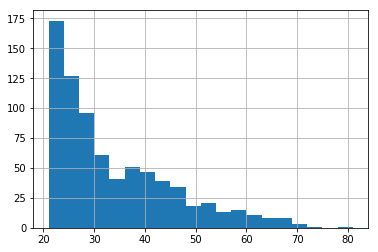

In [22]:
diabetes['Age'].hist(bins=20)

In [23]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [24]:
feat_cols = [num_preg, glucose, pressure, triceps, insulin, bmi, pedigree, 
             assigned_group, age_bucket]

In [26]:
x_data = diabetes.drop('Class', axis=1)

In [27]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [28]:
labels = diabetes['Class']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels,
                                                   test_size=0.3, random_state=101)

In [31]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train, y_train, 
                            batch_size=10, num_epochs=1000, shuffle=True)

In [32]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_save_checkpoints_steps': None, '_log_step_count_steps': 100, '_keep_checkpoint_max': 5, '_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_session_config': None, '_model_dir': '/var/folders/k0/n13f5nxx3sj00h9hd4vhfg340000gn/T/tmpdqqq0an0'}


In [33]:
model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/k0/n13f5nxx3sj00h9hd4vhfg340000gn/T/tmpdqqq0an0/model.ckpt.
INFO:tensorflow:step = 1, loss = 6.93147
INFO:tensorflow:global_step/sec: 236.975
INFO:tensorflow:step = 101, loss = 7.48753 (0.423 sec)
INFO:tensorflow:global_step/sec: 241.306
INFO:tensorflow:step = 201, loss = 7.83812 (0.414 sec)
INFO:tensorflow:global_step/sec: 297.15
INFO:tensorflow:step = 301, loss = 3.46061 (0.337 sec)
INFO:tensorflow:global_step/sec: 327.644
INFO:tensorflow:step = 401, loss = 6.47016 (0.305 sec)
INFO:tensorflow:global_step/sec: 367.611
INFO:tensorflow:step = 501, loss = 6.12377 (0.272 sec)
INFO:tensorflow:global_step/sec: 336.148
INFO:tensorflow:step = 601, loss = 5.46937 (0.298 sec)
INFO:tensorflow:global_step/sec: 315.532
INFO:tensorflow:step = 701, loss = 4.93069 (0.317 sec)
INFO:tensorflow:global_step/sec: 347.741
INFO:tensorflow:step = 801, loss = 5.9726 (0.287 sec)
INFO:tensorflow:global_step/se

In [34]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(X_test, y_test,
                                        batch_size=10, num_epochs=1,
                                                     shuffle=False)

In [35]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-05-10-01:03:36
INFO:tensorflow:Restoring parameters from /var/folders/k0/n13f5nxx3sj00h9hd4vhfg340000gn/T/tmpdqqq0an0/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-05-10-01:03:37
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.735931, accuracy_baseline = 0.649351, auc = 0.800823, auc_precision_recall = 0.643701, average_loss = 0.526207, global_step = 1000, label/mean = 0.350649, loss = 5.06474, prediction/mean = 0.366511


In [36]:
results

{'accuracy': 0.73593074,
 'accuracy_baseline': 0.64935064,
 'auc': 0.80082309,
 'auc_precision_recall': 0.64370096,
 'average_loss': 0.52620673,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.0647397,
 'prediction/mean': 0.36651114}

In [37]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(X_test, batch_size=10,
                                                     num_epochs=1, shuffle=False)

In [38]:
predictions = model.predict(pred_input_func)

In [39]:
my_pred = list(predictions)

INFO:tensorflow:Restoring parameters from /var/folders/k0/n13f5nxx3sj00h9hd4vhfg340000gn/T/tmpdqqq0an0/model.ckpt-1000


In [40]:
my_pred

[{'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.54435921], dtype=float32),
  'logits': array([ 0.17790461], dtype=float32),
  'probabilities': array([ 0.45564076,  0.54435921], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.63132972], dtype=float32),
  'logits': array([ 0.5379256], dtype=float32),
  'probabilities': array([ 0.36867028,  0.63132972], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.37278444], dtype=float32),
  'logits': array([-0.52028996], dtype=float32),
  'probabilities': array([ 0.62721556,  0.37278444], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.33963406], dtype=float32),
  'logits': array([-0.66492534], dtype=float32),
  'probabilities': array([ 0.66036594,  0.33963406], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array

## DNN Model

In [41]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_save_checkpoints_steps': None, '_log_step_count_steps': 100, '_keep_checkpoint_max': 5, '_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_session_config': None, '_model_dir': '/var/folders/k0/n13f5nxx3sj00h9hd4vhfg340000gn/T/tmpzyb150ly'}


In [43]:
dnn_model.train(input_fn=input_func, steps=1000)

ValueError: Items of feature_columns must be a _DenseColumn. You can wrap a categorical column with an embedding_column or indicator_column. Given: _VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [45]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [46]:
feat_cols = [num_preg, glucose, pressure, triceps, insulin, bmi, pedigree, 
             embedded_group_col, age_bucket]

In [47]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train, y_train,
                                                batch_size=10, num_epochs=1000, shuffle=True)

In [48]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_save_checkpoints_steps': None, '_log_step_count_steps': 100, '_keep_checkpoint_max': 5, '_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_session_config': None, '_model_dir': '/var/folders/k0/n13f5nxx3sj00h9hd4vhfg340000gn/T/tmpxgvbgmep'}


In [49]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/k0/n13f5nxx3sj00h9hd4vhfg340000gn/T/tmpxgvbgmep/model.ckpt.
INFO:tensorflow:step = 1, loss = 6.95407
INFO:tensorflow:global_step/sec: 246.201
INFO:tensorflow:step = 101, loss = 4.99146 (0.413 sec)
INFO:tensorflow:global_step/sec: 270.522
INFO:tensorflow:step = 201, loss = 7.05226 (0.364 sec)
INFO:tensorflow:global_step/sec: 288.499
INFO:tensorflow:step = 301, loss = 2.82701 (0.346 sec)
INFO:tensorflow:global_step/sec: 252.295
INFO:tensorflow:step = 401, loss = 4.86364 (0.397 sec)
INFO:tensorflow:global_step/sec: 270.06
INFO:tensorflow:step = 501, loss = 4.60664 (0.371 sec)
INFO:tensorflow:global_step/sec: 248.611
INFO:tensorflow:step = 601, loss = 1.91234 (0.401 sec)
INFO:tensorflow:global_step/sec: 220.526
INFO:tensorflow:step = 701, loss = 6.53658 (0.455 sec)
INFO:tensorflow:global_step/sec: 197.475
INFO:tensorflow:step = 801, loss = 7.37448 (0.505 sec)
INFO:tensorflow:global_step/s

In [50]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(X_test, y_test, batch_size=10, num_epochs=1,shuffle=False)

In [51]:
dnn_model.evaluate(input_fn=eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-05-11-00:37:30
INFO:tensorflow:Restoring parameters from /var/folders/k0/n13f5nxx3sj00h9hd4vhfg340000gn/T/tmpxgvbgmep/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-05-11-00:37:31
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.748918, accuracy_baseline = 0.649351, auc = 0.821811, auc_precision_recall = 0.695778, average_loss = 0.504814, global_step = 1000, label/mean = 0.350649, loss = 4.85883, prediction/mean = 0.394926


{'accuracy': 0.74891776,
 'accuracy_baseline': 0.64935064,
 'auc': 0.82181078,
 'auc_precision_recall': 0.69577754,
 'average_loss': 0.50481355,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.8588305,
 'prediction/mean': 0.39492643}